1. Import library

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


2. Load data

In [29]:
df = pd.read_csv("/content/drive/MyDrive/Data_Mining/tugas_kuliah/StudentsPerformance.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


📌 Step 3: Pilih Fitur & Target

Kita coba prediksi nilai matematika (math score) dari nilai membaca (reading score).

In [30]:
X = df[["reading score"]]   # fitur independen
y = df["math score"]        # target


📌 Step 4: Split Data

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


📌 Step 5: Buat & Latih Model

In [32]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

📌 Step 6: Evaluasi Model

In [33]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R² Score:", r2)
print("Intercept:", model.intercept_)
print("Koefisien:", model.coef_[0])


MSE: 77.75953982761706
R² Score: 0.6804469009921283
Intercept: 7.615915147722099
Koefisien: 0.8465291474700295


📌 Step 7: Visualisasi

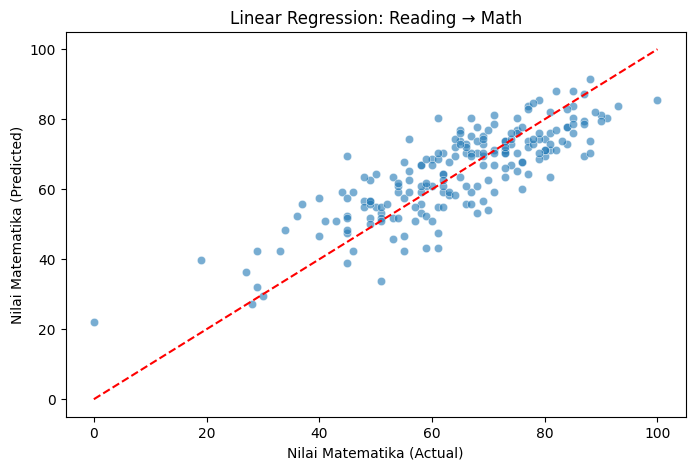

In [34]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([0, 100], [0, 100], color="red", linestyle="--")
plt.xlabel("Nilai Matematika (Actual)")
plt.ylabel("Nilai Matematika (Predicted)")
plt.title("Linear Regression: Reading → Math")
plt.show()


📊 Hasil

MSE = 77.76
→ Rata-rata error prediksi sekitar ±8.8 poin (karena √77.76 ≈ 8.8).
Artinya, model bisa memprediksi nilai matematika dengan deviasi sekitar 9 poin dari nilai sebenarnya.

R² = 0.68
→ Sekitar 68% variasi nilai matematika bisa dijelaskan hanya dari nilai membaca.
Sisanya 32% dipengaruhi faktor lain (misalnya kemampuan menulis, motivasi, atau variabel lain yang tidak kita pakai).

Intercept = 7.62
→ Jika nilai membaca = 0, model memprediksi nilai matematika sekitar 7.6 poin.
(Interpretasi awal saja, secara praktis jarang ada skor membaca = 0).

Koefisien = 0.85
→ Setiap kenaikan 1 poin nilai membaca, rata-rata nilai matematika meningkat 0.85 poin.
Jadi hubungan antara membaca dan matematika cukup kuat & positif.

Ini adalah visualisasi kesimpulan dari model regresi linear sederhana:

Garis merah → garis regresi yang dipelajari model.

Titik biru → data aktual siswa (reading vs math score).

Nilai evaluasi:

MSE ≈ 77.76 → rata-rata error prediksi sekitar 8–9 poin.

R² ≈ 0.68 → sekitar 68% variasi nilai Math dapat dijelaskan oleh nilai Reading.

Koefisien ≈ 0.85 → setiap kenaikan 1 poin di Reading, Math naik sekitar 0.85 poin.

Intercept ≈ 7.62 → saat Reading = 0, Math diprediksi 7.62 (nilai ini hanya interpretasi matematis, bukan kasus nyata).

Kesimpulan: Ada hubungan positif yang cukup kuat antara Reading Score dan Math Score — siswa dengan kemampuan membaca tinggi cenderung juga memiliki nilai matematika lebih tinggi.